## Fuel Consumption and Carbon dioxide emission of cars linear model
## Simple Linear Regression

Metadata
contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada.
Data Source:

[Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64)


- **MODELYEAR** e.g. 2014
- **MAKE** e.g. Acura
- **MODEL** e.g. ILX
- **VEHICLE CLASS** e.g. SUV
- **ENGINE SIZE** e.g. 4.7
- **CYLINDERS** e.g 6
- **TRANSMISSION** e.g. A6
- **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
- **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
- **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
- **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0


In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [4]:
df = pd.read_csv(r"C:\Users\USER-PC\OneDrive\Data Analytics\Data Science_Machine Learning\Machine Learning (1)\FuelConsumption.csv")
df.head()

,ModelYear,Make,Model,Vehicle Class,Engine Size,Cylinders,Transmission,FuelType,Fuel Consumption City (L/100 km),Fuel Consumption City Hwy (L/100 km),Fuel Consumption City Comb (L/100 km),Comb (mpg),CO2 Emissions (g/km),CO2 Rating,Smog Rating
0,2019,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33,199,6,3
1,2019,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS9,Z,12.2,9.0,10.8,26,252,4,3
2,2019,Acura,MDX SH-AWD A-SPEC,SUV: Small,3.5,6,AS9,Z,12.2,9.5,11.0,26,258,4,3
3,2019,Acura,MDX Hybrid AWD,SUV: Small,3.0,6,AM7,Z,9.1,9.0,9.0,31,210,5,3
4,2019,Acura,NSX,Two-seater,3.5,6,AM9,Z,11.1,10.8,11.0,26,261,4,3


In [6]:
#Exploratory Data Analysis

df.describe()

,ModelYear,Engine Size,Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption City Hwy (L/100 km),Fuel Consumption City Comb (L/100 km),Comb (mpg),CO2 Emissions (g/km),CO2 Rating,Smog Rating
count,1022.0,1022.000000,1022.000000,1022.000000,1022.00000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000
mean,2019.0,3.110861,5.588063,12.363209,9.02319,10.857730,27.683953,250.762231,4.575342,4.144814
std,0.0,1.320259,1.800961,3.306124,2.05046,2.705248,7.355990,57.054017,1.656524,1.782098
min,2019.0,1.000000,3.000000,4.200000,4.00000,4.100000,13.000000,96.000000,1.000000,1.000000
25%,2019.0,2.000000,4.000000,10.200000,7.60000,9.100000,23.000000,211.250000,3.000000,3.000000
50%,2019.0,3.000000,6.000000,12.000000,8.70000,10.600000,27.000000,247.500000,4.000000,5.000000
75%,2019.0,3.600000,6.000000,14.300000,10.20000,12.500000,31.000000,289.000000,5.000000,5.000000
max,2019.0,8.000000,16.000000,26.800000,17.20000,22.200000,69.000000,522.000000,10.000000,7.000000


In [7]:
cdf = df[['Engine Size','Cylinders','Comb (mpg)','CO2 Emissions (g/km)']]
cdf.head(9)

,Engine Size,Cylinders,Comb (mpg),CO2 Emissions (g/km)
0,2.4,4,33,199
1,3.5,6,26,252
2,3.5,6,26,258
3,3.0,6,31,210
4,3.5,6,26,261
5,2.0,4,29,232
6,2.0,4,27,242
7,3.5,6,34,196
8,2.4,4,32,205


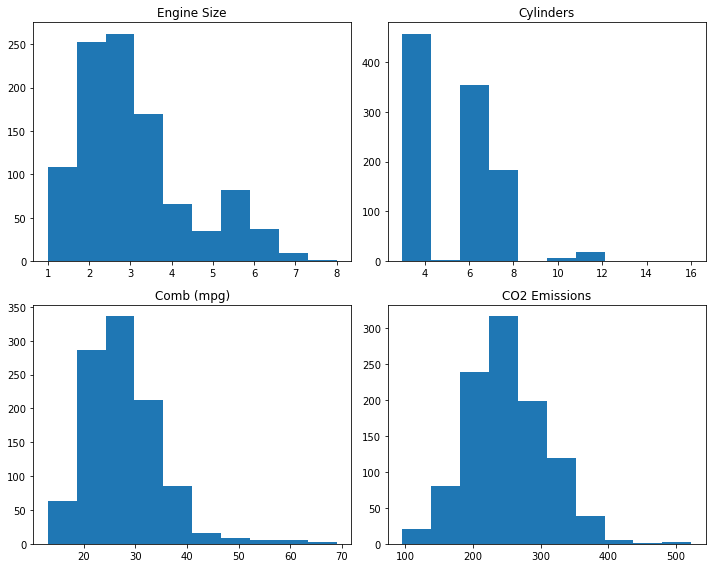

In [11]:
# Plotting them together

import matplotlib.pyplot as plt

cdf = df[['Engine Size','Cylinders','Comb (mpg)','CO2 Emissions (g/km)']]

fig, axs = plt.subplots(2, 2, figsize=(10,8))

axs[0,0].hist(cdf['Engine Size'])
axs[0,0].set_title('Engine Size')

axs[0,1].hist(cdf['Cylinders'])  
axs[0,1].set_title('Cylinders')

axs[1,0].hist(cdf['Comb (mpg)'])
axs[1,0].set_title('Comb (mpg)') 

axs[1,1].hist(cdf['CO2 Emissions (g/km)'])
axs[1,1].set_title('CO2 Emissions')

fig.tight_layout()
plt.show()


Plot each feature against the target "Emission"


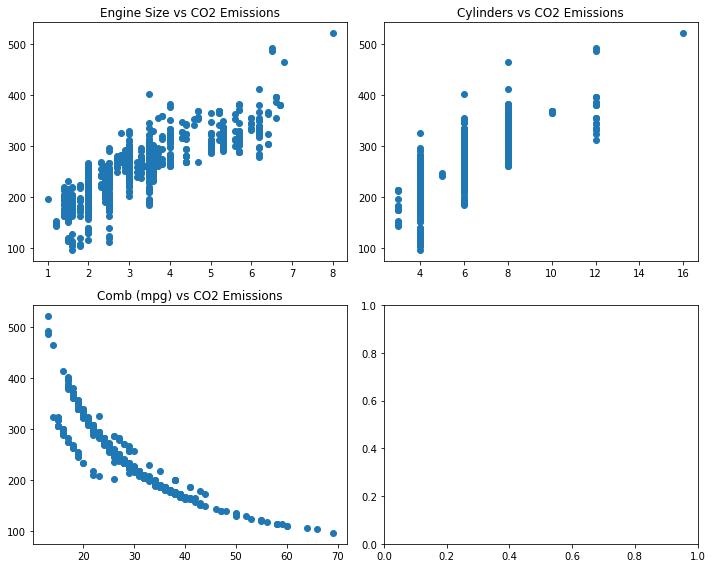

In [12]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, figsize=(10,8))

axs[0,0].scatter(cdf['Engine Size'], cdf['CO2 Emissions (g/km)'])
axs[0,0].set_title('Engine Size vs CO2 Emissions')

axs[0,1].scatter(cdf['Cylinders'], cdf['CO2 Emissions (g/km)'])
axs[0,1].set_title('Cylinders vs CO2 Emissions')

axs[1,0].scatter(cdf['Comb (mpg)'], cdf['CO2 Emissions (g/km)'])  
axs[1,0].set_title('Comb (mpg) vs CO2 Emissions')

fig.tight_layout()
plt.show()


Text(0.5, 1.0, 'Regression plot')

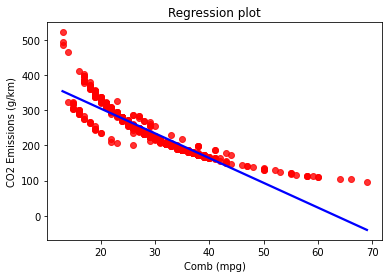

In [15]:
import seaborn as sns
g = sns.regplot(x="Comb (mpg)", y="CO2 Emissions (g/km)", data=cdf, 
                color='r', ci=None, line_kws={'color':'b'})
g.set_title('Regression plot')


 Train and Test Split

In [18]:
msk = np.random.rand(len(df)) < 0.8
msk

train = cdf[msk]
test = cdf[~msk]

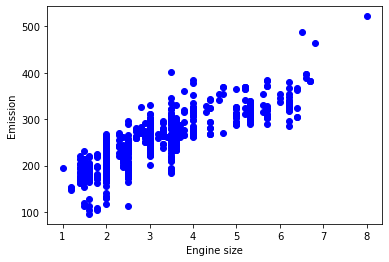

In [19]:
# Train data distribution
plt.scatter(train['Engine Size'], train['CO2 Emissions (g/km)'],  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [20]:
# Modelling


from sklearn.linear_model import LinearRegression
regr = LinearRegression()
train_x = np.asanyarray(train[['Engine Size']])
train_y = np.asanyarray(train[['CO2 Emissions (g/km)']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)


Coefficients:  [[36.19307809]]
Intercept:  [138.64982699]


Text(0, 0.5, 'Emission')

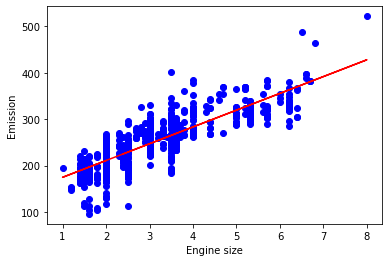

In [21]:
# Plot the line of best fit over the data

plt.scatter(train[['Engine Size']],train[['CO2 Emissions (g/km)']],  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [22]:
test_x = np.asanyarray(test[['Engine Size']])
test_y = np.asanyarray(test[['CO2 Emissions (g/km)']])

In [24]:
# Finding R square, MAE MSE


from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Predict on test set
y_pred = regr.predict(test_x) 

# R2 score
r2 = r2_score(test_y, y_pred)
print('R2 score: ', r2)

# MAE
mae = mean_absolute_error(test_y, y_pred)
print('MAE: ', mae) 

# MSE
mse = mean_squared_error(test_y, y_pred)  
print('MSE: ', mse)


R2 score:  0.7074392837690529
MAE:  25.431420966945193
MSE:  1104.1263904391878
